#### Este conjunto de dados mostra a distribuição global  de manguezais, derivadas de imagens de satélite de observação da Terra

###### Estes dados são distribuidos pelo Global Forest Watch (GFW)

O GFW é uma plataforma online que fornece dados e ferramentas para monitoramento de florestas. Ao aproveitar a tecnologia de ponta, o GFW permite que qualquer pessoa acesse informações quase em tempo real sobre onde e como as florestas estão mudando em todo o mundo.

O projeto interpretou aproximadamente 1000 cenas landsat usando técnicas híbridas de classificação de imagem digital supervisionadas e não supervisionadas. Os resultados foram validados utilizando os dados gis existentes e a literatura publicada para mapear "verdadeiros manguezais".


###### Mais informações podem ser vistas em:

https://data.globalforestwatch.org/documents/gfw::mangrove-forests/about


Giri C, Ochieng E, Tieszen LL, Zhu Z, Singh A, Loveland T, Masek J, Duke N (2011). Status and distribution of mangrove forests of the world using earth observation satellite data (version 1.3, updated by UNEP-WCMC). Global Ecology and Biogeography 20: 154-159. doi: 10.1111/j.1466-8238.2010.00584.x. Disponível em https://onlinelibrary.wiley.com/doi/10.1111/j.1466-8238.2010.00584.x






In [14]:
#importanto as blibliotecas wget e zipfile para baixar e descompactar o arquivo
import requests
import zipfile
from io import BytesIO

#definindo o url do arquivo e baixando
url = "http://gfw2-data.s3.amazonaws.com/forest_cover/zip/global_mangroves.zip"

arquivo = BytesIO(requests.get(url).content)

#extraindo os arquivos na pasta do notebook
myzip = zipfile.ZipFile(arquivo)
myzip.extractall()

## Importanto os pacotes, lendo e tratando o dataset da distribuição global de manguezais

In [1]:
# importando as bibliotecas utilzadas na análise e plotagem dos dados do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pycountry_convert as pc
import pycountry

In [2]:
#Criando um Df a partir do arquivo shapefile com o pacote geopandas
df = gpd.read_file('global_mangroves.shp')

#imprimindo as 10 primeiras linhas para visualização dos dados
print(df.head(10))

   OBJECTID ISO3  AREA_KM2      AREA_M2  \
0         1  WLF  0.000906   905.690445   
1         2  WLF  0.000906   905.689435   
2         3  WLF  0.000906   905.688425   
3         4  WLF  0.002717  2717.077275   
4         5  WLF  0.002717  2717.069753   
5         6  WLF  0.001811  1811.378057   
6         7  WLF  0.002717  2717.069322   
7         8  WLF  0.001811  1811.378010   
8         9  WLF  0.000906   905.686360   
9        10  WLF  0.000906   905.690255   

                                            geometry  
0  POLYGON ((-176.22577 -13.25528, -176.22587 -13...  
1  POLYGON ((-176.22566 -13.25555, -176.22594 -13...  
2  POLYGON ((-176.22556 -13.25582, -176.22566 -13...  
3  POLYGON ((-176.22552 -13.25664, -176.22584 -13...  
4  POLYGON ((-176.22549 -13.25745, -176.22580 -13...  
5  POLYGON ((-176.22556 -13.25799, -176.22576 -13...  
6  POLYGON ((-176.22556 -13.25799, -176.22524 -13...  
7  POLYGON ((-176.22604 -13.25962, -176.22614 -13...  
8  POLYGON ((-176.22621 -13.259

In [3]:
#Observem que os nomes dos países vem codificado em ISO3. Para obter o nome é utilizado a pacote pycountry

#Lista do código ISO3
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

#Definindo a função para buscar cada valor da coluna "ISO3" na lista do código ISO3 e retornar o nome do país
def country_flag(df):
    if (len(df['ISO3'])==3 and df['ISO3'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['ISO3']).name
    else:
        return 'Invalid Code'

#Adicionado ao Df a nova coluna "country_name" criada com os nomes dos paises
df['country_name']=df.apply(country_flag, axis = 1)

#imprimindo as 10 primeiras linhas para visualização dos dados
print(df.head(10))

   OBJECTID ISO3  AREA_KM2      AREA_M2  \
0         1  WLF  0.000906   905.690445   
1         2  WLF  0.000906   905.689435   
2         3  WLF  0.000906   905.688425   
3         4  WLF  0.002717  2717.077275   
4         5  WLF  0.002717  2717.069753   
5         6  WLF  0.001811  1811.378057   
6         7  WLF  0.002717  2717.069322   
7         8  WLF  0.001811  1811.378010   
8         9  WLF  0.000906   905.686360   
9        10  WLF  0.000906   905.690255   

                                            geometry       country_name  
0  POLYGON ((-176.22577 -13.25528, -176.22587 -13...  Wallis and Futuna  
1  POLYGON ((-176.22566 -13.25555, -176.22594 -13...  Wallis and Futuna  
2  POLYGON ((-176.22556 -13.25582, -176.22566 -13...  Wallis and Futuna  
3  POLYGON ((-176.22552 -13.25664, -176.22584 -13...  Wallis and Futuna  
4  POLYGON ((-176.22549 -13.25745, -176.22580 -13...  Wallis and Futuna  
5  POLYGON ((-176.22556 -13.25799, -176.22576 -13...  Wallis and Futuna  
6  POLYG

## Calculando a área mundial de manguezais e contribuição % de cada localidade

In [4]:
#Definindo a variável "area_manguezal_mudial" como a soma das áreas de manguezais em todos os países - coluna "AREA_KM2" do Df
area_manguezal_mudial=df['AREA_KM2'].sum()

#imprimindo o valor da área mundial de manguezal
print("Área mundial de manguezais:",area_manguezal_mudial.round(2),"Km²")

Área mundial de manguezais: 138543.24 Km²


In [5]:
#calculando a porcentagem de cada localidade referente a área mundial de manguezais

#definindo a função para calcular a contribuição de cada área
def porcentagem(df):
    for i in df:
        porcentagem = (df['AREA_KM2']*100)/area_manguezal_mudial
        return porcentagem
    
#Adicionado ao Df a nova coluna "%" criada com a contribuição percentual de cada localidade    
df['%']=df.apply(porcentagem, axis = 1)

#imprimindo as 10 primeiras linhas para visualização dos dados
print(df.head(10))

   OBJECTID ISO3  AREA_KM2      AREA_M2  \
0         1  WLF  0.000906   905.690445   
1         2  WLF  0.000906   905.689435   
2         3  WLF  0.000906   905.688425   
3         4  WLF  0.002717  2717.077275   
4         5  WLF  0.002717  2717.069753   
5         6  WLF  0.001811  1811.378057   
6         7  WLF  0.002717  2717.069322   
7         8  WLF  0.001811  1811.378010   
8         9  WLF  0.000906   905.686360   
9        10  WLF  0.000906   905.690255   

                                            geometry       country_name  \
0  POLYGON ((-176.22577 -13.25528, -176.22587 -13...  Wallis and Futuna   
1  POLYGON ((-176.22566 -13.25555, -176.22594 -13...  Wallis and Futuna   
2  POLYGON ((-176.22556 -13.25582, -176.22566 -13...  Wallis and Futuna   
3  POLYGON ((-176.22552 -13.25664, -176.22584 -13...  Wallis and Futuna   
4  POLYGON ((-176.22549 -13.25745, -176.22580 -13...  Wallis and Futuna   
5  POLYGON ((-176.22556 -13.25799, -176.22576 -13...  Wallis and Futuna   
6

## Plotando gráfico de barras dos 30 países com maior área de manguezal

##### Preparando os dados

In [6]:
#Criando novo Df com as área ordenadas de forma decrescente juntamente com a soma das áreas de cada pais 
#(se observar no df de origem para cada país pode haver mais de uma área)

area_ordenada=df.groupby('country_name').sum().reset_index().sort_values('AREA_KM2', ascending=False)

#Criando  Df com os 30 países com maior área de manguezal
area_30_paises = area_ordenada.nlargest(30, 'AREA_KM2')

#imprimindo o df dos 30 países com maior área de manguezal
print(area_30_paises)

                          country_name      OBJECTID      AREA_KM2  \
48                           Indonesia  135474264529  27914.415470   
12                              Brazil   46414493142  10589.576389   
4                            Australia   26078415095   9634.851230   
64                              Mexico   47651078144   7296.583132   
73                             Nigeria   91800593361   6266.174490   
58                            Malaysia   96516928248   5591.138529   
68                             Myanmar  113592238241   5076.665415   
79                    Papua New Guinea    4436316022   4746.459998   
7                           Bangladesh     638033871   4456.785463   
22                                Cuba    6532498773   4280.825926   
47                               India   28741679205   3868.460892   
111  Venezuela, Bolivarian Republic of   10408800512   3355.158779   
67                          Mozambique   10522757286   2957.031534   
42                  

##### Plotando os 30 páises com maior área de manguezal

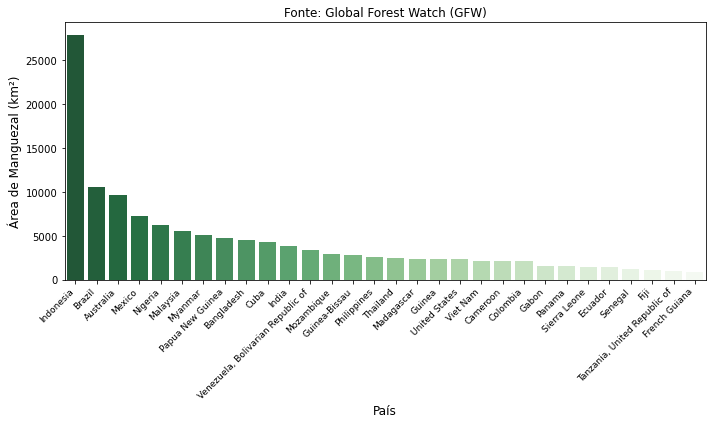

In [18]:
#definindo dimensões da figura
plt.figure(figsize=(10,6))

#definindo os eixos, a fonte de dados e paletas de cores 
ax=sns.barplot(x="country_name", y='AREA_KM2', data=area_30_paises,palette = 'Greens_r',alpha=0.9)

#rotacionando eixo x em 45º
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", size=9)

#adicionando título ao gráfico
ax.set_title("Fonte: Global Forest Watch (GFW)")

#definindo os nomes dos eixos
ax.set_xlabel("País",size=12)
ax.set_ylabel("Área de Manguezal (km²)",size=12)

#definindo  fundo 
plt.tight_layout()
plt.show()

##### Plotando a área de manguezal de todos os países

A visualização não é muito boa

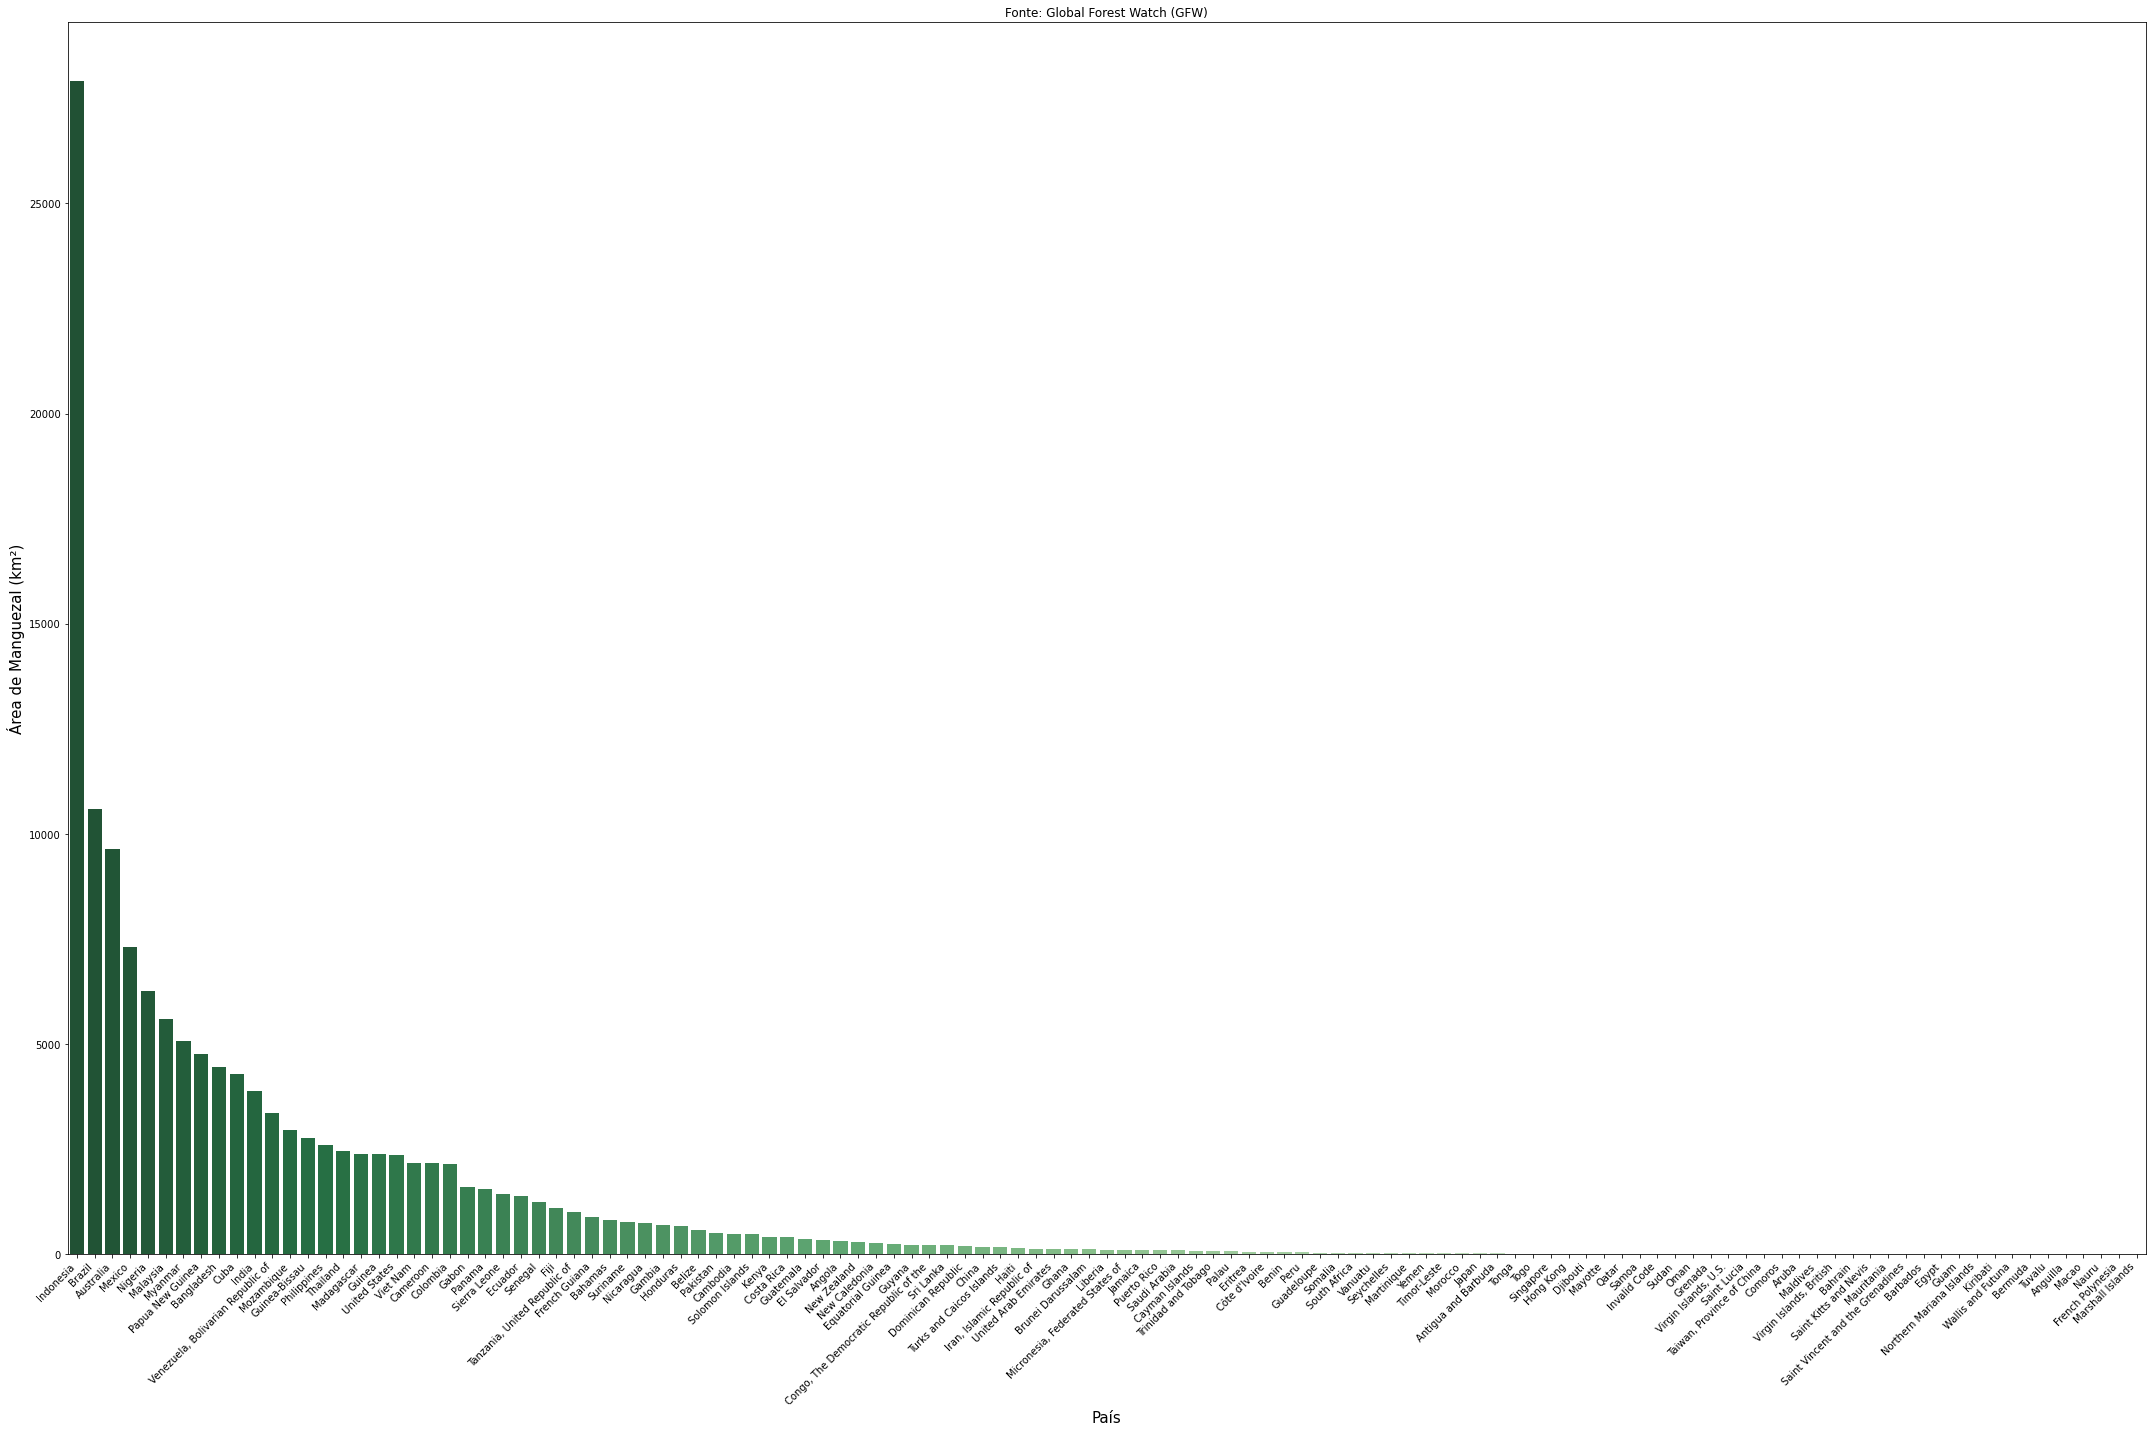

In [19]:
#definindo dimensões da figura
plt.figure(figsize=(30,20))

#definindo os eixos, a fonte de dados e paletas de cores 
ax=sns.barplot(x="country_name", y='AREA_KM2', data=area_ordenada, palette = 'Greens_r',alpha=0.9)

#rotacionando eixo x em 45º
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

#adicionando título ao gráfico
ax.set_title("Fonte: Global Forest Watch (GFW)")

#definindo os nomes dos eixos
ax.set_xlabel("País",size=15)
ax.set_ylabel("Área de Manguezal (km²)",size=15)

#definindo  fundo 
plt.tight_layout()
plt.show()

## Plotando gráfico de pizza com a contibuição % dos 5 paises com maior área de manguezais

##### Preparando os dados

In [20]:
#Criando  Df com os 5 países com maior área de manguezal
area_5_paises = area_ordenada.nlargest(5, 'AREA_KM2')

#Criando  Df com os paises apartir da 5º local com maior área de manguezal
filtro_outros_paises  = area_ordenada['AREA_KM2'] < area_ordenada.AREA_KM2[4]
df_outros_paises = area_ordenada[filtro_outros_paises]



In [21]:
#Definindo  o valores de cada coluna para a soma dos demais países
#definindo e somando as áres em Km2 dos demais países 
KM2_outros_paises =df_outros_paises['AREA_KM2'].sum()

#definindo e somando as áres em M2 dos demais países 
M2_outros_paises =df_outros_paises['AREA_M2'].sum()


#country_name
Outros_paises=['Outros Países']

#%
pocentagem_outros_paises =df_outros_paises['%'].sum()


In [22]:
#Criando o Df com os dados dos demais países deifinidos na linha anterior
outros = pd.DataFrame({'country_name':Outros_paises,
                   'AREA_KM2':KM2_outros_paises,
                   'AREA_M2':M2_outros_paises,
                   '%':pocentagem_outros_paises})

In [23]:
#Criando um Df onde são mostrados os valores dos 5 países com maior área de manguezal e a soma dos demais países
area_5_paises_outros_paises = pd.concat([area_5_paises, outros])
area_5_paises_outros_paises

,country_name,OBJECTID,AREA_KM2,AREA_M2,%
48,Indonesia,1.354743e+11,27914.415470,2.791442e+10,20.148522
12,Brazil,4.641449e+10,10589.576389,1.058958e+10,7.643517
4,Australia,2.607842e+10,9634.851230,9.634851e+09,6.954400
64,Mexico,4.765108e+10,7296.583132,7.296583e+09,5.266647
73,Nigeria,9.180059e+10,6266.174490,6.266174e+09,4.522902
0,Outros Países,NaN,90404.398485,9.040440e+10,65.253561


##### Plotando o gráfico

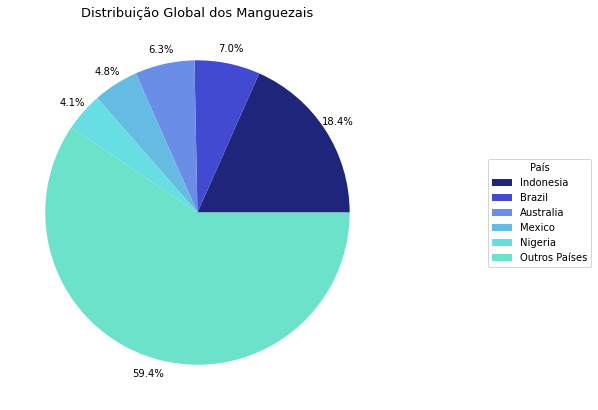

In [24]:
#Definindo as cores de cada country_name
cores_grafico =["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"]

#Definindo as dimensões da figura
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

#definindo os eixos, a fonte de dados e paletas de cores 
ax.pie(area_5_paises_outros_paises['AREA_KM2'], autopct='%0.1f%%', pctdistance=1.10, colors=cores_grafico)

#definindo as configurações e localização da legenda 
ax.legend(area_5_paises_outros_paises['country_name'], title="País", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))

#adicionando título ao gráfico
ax.set_title("Distribuição Global dos Manguezais",size=13)

plt.show()